In [126]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow.keras import models, layers, regularizers, metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics as met
from imblearn.over_sampling import SMOTE


In [127]:
# loading
y = np.genfromtxt('../../data/processed_files/test/label.csv',delimiter=',')

In [128]:
X = np.genfromtxt('../../data/processed_files/test/features.csv',delimiter=',')

In [129]:
#splitting
x_train, x_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 test_size = .2,
                                                 random_state=12)

In [130]:
# resampling the traninging data to change the balnce the data
sm = SMOTE(random_state=12)
x_res, y_res = sm.fit_sample(x_train, y_train)

In [131]:
# turning the array to tensors
y_train_res = tf.convert_to_tensor(y_res, dtype='float32')
x_train_res = tf.convert_to_tensor(x_res, dtype='float32')

In [132]:
X_val = tf.convert_to_tensor(x_val, dtype='float32')
Y_val = tf.convert_to_tensor(y_val, dtype='float32')

In [133]:
# makeing the tensorflow data 
data_train = tf.data.Dataset.from_tensor_slices(
    (x_train_res, y_train_res)

).cache()

data_validate = tf.data.Dataset.from_tensor_slices(
    (X_val, Y_val)).cache()

In [134]:
metrics.AUC


tensorflow.python.keras.metrics.AUC

In [135]:
X[0].shape

(18,)

In [136]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(18, 1, 1)))
model.add(layers.Dense(18, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 18)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 18)                342       
_________________________________________________________________
dense_22 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 10        
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


In [137]:

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='./cp.ckpt',
                                                 save_weights_only=True,
                                                 verbose=1)

In [138]:
history = model.fit(data_train.shuffle(10000).batch(32), 
                    epochs=5, 
                    validation_data=data_validate.batch(32),
                    callbacks=[cp_callback])

Epoch 1/5
541/574 [===========================>..] - ETA: 0s - loss: 0.5888 - accuracy: 0.6893WARNING:tensorflow:Model was constructed with shape (None, 18, 1, 1) for input Tensor("flatten_8_input:0", shape=(None, 18, 1, 1), dtype=float32), but it was called on an input with incompatible shape (None, 18).

Epoch 00001: saving model to ./cp.ckpt
574/574 [==============================] - 1s 2ms/step - loss: 0.5814 - accuracy: 0.6953 - val_loss: 0.4945 - val_accuracy: 0.7830
Epoch 2/5
562/574 [============================>.] - ETA: 0s - loss: 0.3607 - accuracy: 0.8518
Epoch 00002: saving model to ./cp.ckpt
574/574 [==============================] - 1s 1ms/step - loss: 0.3590 - accuracy: 0.8528 - val_loss: 0.3995 - val_accuracy: 0.8223
Epoch 3/5
559/574 [============================>.] - ETA: 0s - loss: 0.2624 - accuracy: 0.8974
Epoch 00003: saving model to ./cp.ckpt
574/574 [==============================] - 1s 1ms/step - loss: 0.2611 - accuracy: 0.8984 - val_loss: 0.2753 - val_accuracy:

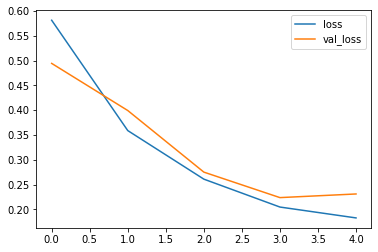

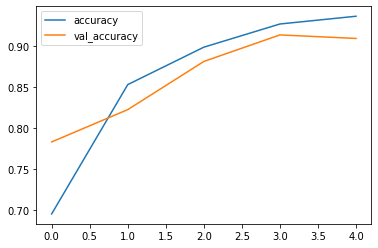

In [139]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.close()

In [140]:
np.hstack([model.predict(X_val), Y_val[:,np.newaxis]])

array([[0.20352316, 0.        ],
       [0.9830735 , 1.        ],
       [0.01173615, 0.        ],
       ...,
       [0.2497361 , 0.        ],
       [0.8423714 , 1.        ],
       [0.9339486 , 1.        ]], dtype=float32)

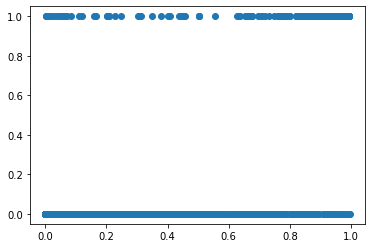

In [141]:
plt.scatter(model.predict(X_val), Y_val)

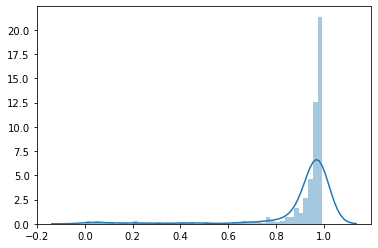

In [142]:
sns.distplot(model.predict(X_val)[Y_val==1])

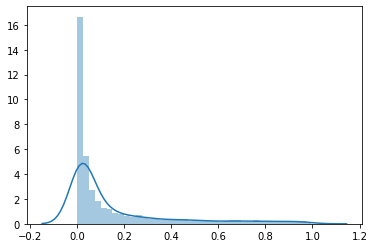

In [143]:
sns.distplot(model.predict(X_val)[Y_val==0])

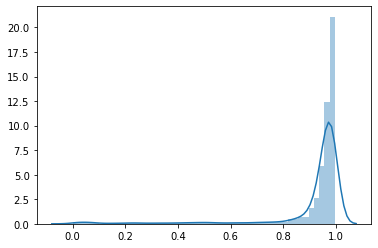

In [144]:
sns.distplot(model.predict(x_train_res)[y_train_res==1])

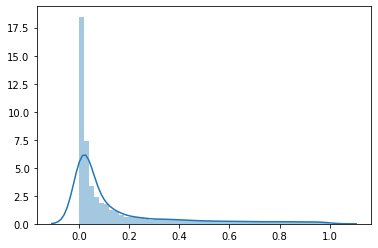

In [145]:
sns.distplot(model.predict(x_train_res)[y_train_res==0])

In [146]:
#roc auc
met.roc_auc_score(Y_val,model.predict(X_val))

0.9748287720201327

In [147]:
prob = model.predict(x_train_res)

In [148]:
prob

array([[0.570405  ],
       [0.00277984],
       [0.01098147],
       ...,
       [0.9857    ],
       [0.96781975],
       [0.98690027]], dtype=float32)

In [167]:
x_train_res[0:1]

<tf.Tensor: shape=(1, 18), dtype=float32, numpy=
array([[0.4945055 , 0.59375   , 0.2       , 0.41588786, 0.25      ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        ]], dtype=float32)>

In [150]:
test_array = np.array([0.4945055 , 0.59375   , 0.2       , 0.41588786, 0.25      ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        ])

In [151]:
test_tensor = tf.convert_to_tensor(test_array, dtype='float32')

In [158]:
test_tensor

<tf.Tensor: shape=(18,), dtype=float32, numpy=
array([0.4945055 , 0.59375   , 0.2       , 0.41588786, 0.25      ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        ], dtype=float32)>

In [169]:
model.predict_proba(tf.reshape(test_tensor, [1, 18]))

array([[0.5704049]], dtype=float32)

In [170]:
model.evaluate(tf.reshape(test_tensor, [1, 18]))

1/1 [==============================] - 0s 1000us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [ ]:
model.predict_proba(x_train_res)

In [168]:
tf.reshape(test_tensor, [1, 18])

<tf.Tensor: shape=(1, 18), dtype=float32, numpy=
array([[0.4945055 , 0.59375   , 0.2       , 0.41588786, 0.25      ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        ]], dtype=float32)>

In [184]:
test_tensor

<tf.Tensor: shape=(18,), dtype=float32, numpy=
array([0.4945055 , 0.59375   , 0.2       , 0.41588786, 0.25      ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        ], dtype=float32)>

In [171]:
new_model = models.Sequential()
new_model.add(layers.Flatten(input_shape=(18, 1, 1)))
new_model.add(layers.Dense(18, activation='relu'))
new_model.add(layers.Dense(9, activation='relu'))
new_model.add(layers.Dense(1, activation='sigmoid'))
new_model.summary()


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 18)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 18)                342       
_________________________________________________________________
dense_25 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 10        
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


In [173]:
# Loads the weights
new_model.load_weights('./cp.ckpt')

In [175]:
result= new_model.predict_proba(tf.reshape(test_tensor, [1, 18]))

In [185]:
result[0][0]

array([[0.5704049]], dtype=float32)

In [186]:
model.save('model.h5')

In [187]:
ur_model = tf.keras.models.load_model('model.h5')

In [188]:
ur_model.predict_proba(tf.reshape(test_tensor, [1, 18]))

array([[0.5704049]], dtype=float32)